# Dog vs Cat Challenge


In [1]:
# load datasets
import pandas as pd
import numpy as np 
import cv2
import os
from random import shuffle
from tqdm import tqdm
import tensorflow
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard

TRAIN_DIR = "Dog_Cat/train/train"
TEST_DIR = "Dog_Cat/test"
IMG_SIZE = 75


c:\users\ahmad abd elhameed\anaconda3\envs\dog_cat\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\ahmad abd elhameed\anaconda3\envs\dog_cat\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\ahmad abd elhameed\anaconda3\envs\dog_cat\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\ahmad abd elhameed\

In [2]:
print(os.listdir("Dog_Cat"))

['test', 'test.zip', 'train', 'train.zip']


In [3]:
print(len(os.listdir(TRAIN_DIR)))
print(len(os.listdir(TEST_DIR)))


25000
12500


In [4]:
tensorflow.test.is_gpu_available(cuda_only=True,min_cuda_compute_capability=None)

True

In [5]:
def image_label(img):
    word_label = img.split(".")[-3]
    if word_label == 'cat': return [1,0]
    elif word_label == 'dog':return [0,1]

In [6]:
def create_train_data():
    train_data = []
    train_data_dir = os.listdir(TRAIN_DIR)
    for img in tqdm(train_data_dir[:-1000]):
        try:
            label = image_label(img)
        except IndexError:
            continue
            print(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path),(IMG_SIZE,IMG_SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = img/255
        train_data.append([np.array(img),np.array(label)])
    shuffle(train_data)
    return train_data        

In [7]:
def create_valid_data():
    valid_data = []
    valid_data_dir = os.listdir(TRAIN_DIR)
    for img in tqdm(valid_data_dir[-1000:]):
        try:
            label = image_label(img)
        except IndexError:
            continue
            print(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path),(IMG_SIZE,IMG_SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = img/255
        valid_data.append([np.array(img),np.array(label)])
    shuffle(valid_data)
    return valid_data 

In [8]:
def create_test_data():
    test_data = []
    test_data_dir = os.listdir(TEST_DIR)
    for img in tqdm(test_data_dir):
        try:
            num_img = img.split(".")[0]
        except IndexError:
            print(img)
            continue
        path = os.path.join(TEST_DIR,img)
        img = cv2.resize(cv2.imread(path),(IMG_SIZE,IMG_SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = img/255
        test_data.append([np.array(img),num_img])
    shuffle(test_data)
    return test_data 

In [9]:
train_data = create_train_data()

100%|███████████████████████████████████| 24000/24000 [00:58<00:00, 411.62it/s]


In [10]:
valid_data = create_valid_data()

100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 378.22it/s]


In [11]:
test_data = create_test_data()

100%|███████████████████████████████████| 12500/12500 [00:32<00:00, 382.31it/s]


In [12]:
len(valid_data)

1000

In [13]:
len(train_data)

24000

In [14]:
len(test_data)

12500

In [ ]:
#np.save("Cat_Dog_train_data.npy",train_data)

In [ ]:
#np.save("Cat_Dog_valid_data.npy",valid_data)

In [ ]:
#np.save("Cat_Dog_test_data.npy",test_data)

In [15]:
import matplotlib.pyplot as plt

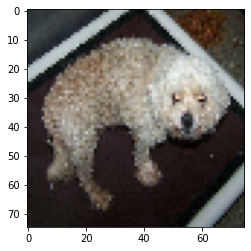

In [39]:
plt.imshow(valid_data[532][0])

In [40]:
valid_data[532][1] ## Dog

array([0, 1])

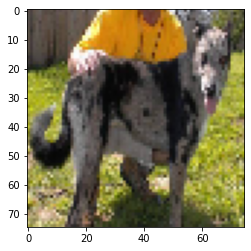

In [20]:
plt.imshow(train_data[0][0])

In [21]:
train_data[0][1] ## Cat

array([0, 1])

### Let's build the Model

c:\users\ahmad abd elhameed\anaconda3\envs\dog_cat\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


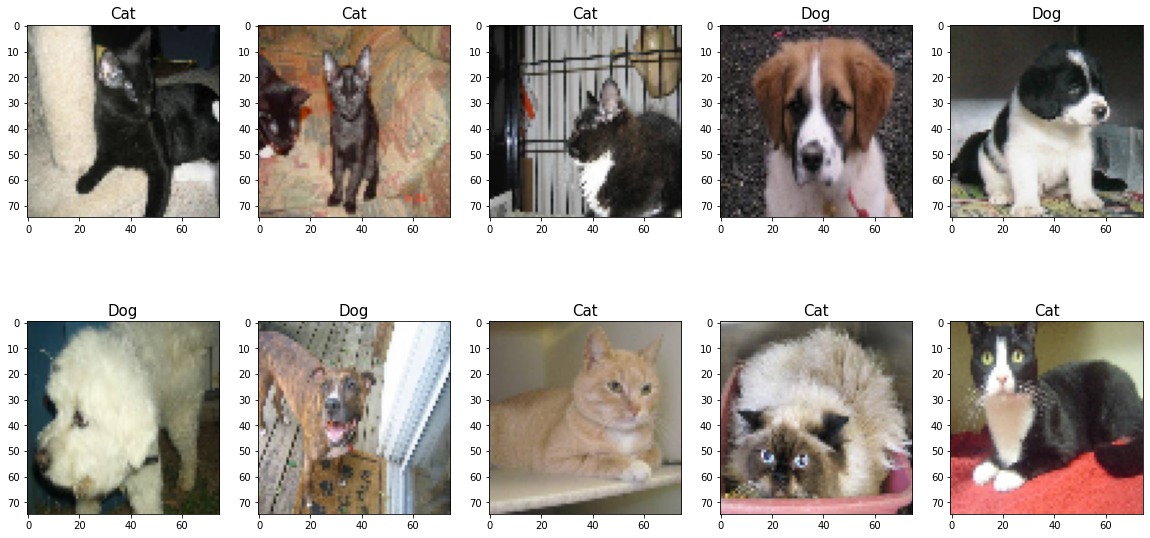

In [22]:
count = 0
num_imgs = 10

plt.figure(figsize=(20,10))
for i in np.random.randint(500,size=num_imgs):
    count+=1
    plt.subplot(num_imgs/5,5,count)
    plt.imshow(train_data[i][0])
    f = train_data[i][1]
    if(f[0]>f[1]):
        plt.title("Cat",fontsize=15)
    else:
        plt.title("Dog",fontsize=15)

In [41]:
img_input = layers.Input(shape= (IMG_SIZE,IMG_SIZE,3))

x = layers.Conv2D(16,3,activation="relu")(img_input)
x = layers.MaxPool2D(2)(x)

x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)

x = layers.Conv2D(64,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)

x = layers.Conv2D(128,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)

#x = layers.Conv2D(256,3,activation="relu")(x)
#x = layers.MaxPool2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512,activation='relu')(x)
     

result = layers.Dense(2,activation='softmax')(x)

## Model

model = Model(img_input,result)

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 73, 73, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0   

In [25]:
x_train = np.array([i[0] for i in tqdm(train_data)]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

100%|███████████████████████████████| 24000/24000 [00:00<00:00, 1411273.22it/s]


In [26]:
y_train = np.array([i[1] for i in tqdm(train_data)])

100%|███████████████████████████████| 24000/24000 [00:00<00:00, 1411233.65it/s]


In [27]:
x_train.shape

(24000, 75, 75, 3)

In [28]:
y_train.shape

(24000, 2)

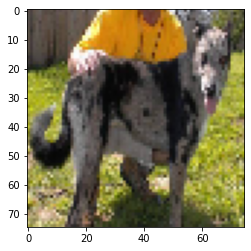

In [29]:
plt.imshow(x_train[0])

In [30]:
x_valid = np.array([i[0] for i in tqdm(valid_data)]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_valid = np.array([i[1] for i in tqdm(valid_data)])

100%|█████████████████████████████████| 1000/1000 [00:00<00:00, 1000549.62it/s]


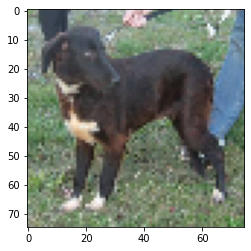

In [31]:
plt.imshow(x_valid[193])

In [33]:
y_valid[193]

array([0, 1])

In [43]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [44]:
model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=1,validation_data=(x_valid,y_valid))

Train on 24000 samples, validate on 1000 samples
Epoch 1/5
24000/24000 [==============================] - 13s 556us/sample - loss: 0.6202 - acc: 0.6457 - val_loss: 0.6376 - val_acc: 0.6380
Epoch 2/5
24000/24000 [==============================] - 13s 522us/sample - loss: 0.5015 - acc: 0.7518 - val_loss: 0.4045 - val_acc: 0.8260
Epoch 3/5
24000/24000 [==============================] - 12s 513us/sample - loss: 0.4267 - acc: 0.8027 - val_loss: 0.4052 - val_acc: 0.8060
Epoch 4/5
24000/24000 [==============================] - 12s 513us/sample - loss: 0.3697 - acc: 0.8340 - val_loss: 0.2995 - val_acc: 0.8690
Epoch 5/5
24000/24000 [==============================] - 12s 514us/sample - loss: 0.3242 - acc: 0.8573 - val_loss: 0.3665 - val_acc: 0.8490


In [45]:
model.save("DogvsCat")

In [53]:
test_data[0][0].shape

(75, 75, 3)

In [62]:
image = plt.imread("cat.png")


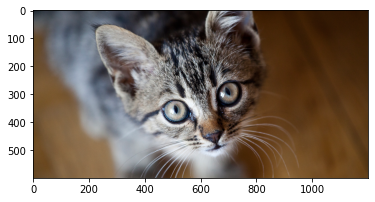

In [63]:
plt.imshow(image)

In [72]:
import urllib

In [83]:
def prepare_image(url_link):
    with urllib.request.urlopen(url_link) as url:
        img = np.asarray(bytearray(url.read()))
        img = cv2.imdecode(img,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img = img/255
        return img

In [92]:
g = prepare_image("https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg")

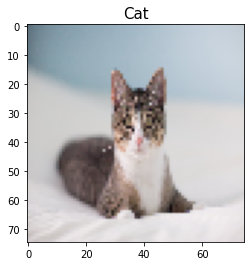

In [93]:
plt.imshow(g)
p = model.predict(g.reshape(1,IMG_SIZE,IMG_SIZE,3))
p = np.array(p)
if(p[0,0]>p[0,1]):
    plt.title("Cat",fontsize=15)
else:
    plt.title("Dog",fontsize=15)

In [79]:
'''count = 0
num_imgs = 10

plt.figure(figsize=(20,10))
for i in np.random.randint(500,size=num_imgs):
    count+=1
    plt.subplot(num_imgs/5,5,count)
    plt.imshow(test_data[i][0])
    p = model.predict(test_data[i])
    p = np.array(p)
    if(p[0,0]>p[0,1]):
        plt.title("Cat",fontsize=15)
    else:
        plt.title("Dog",fontsize=15)'''

'count = 0\nnum_imgs = 10\n\nplt.figure(figsize=(20,10))\nfor i in np.random.randint(500,size=num_imgs):\n    count+=1\n    plt.subplot(num_imgs/5,5,count)\n    plt.imshow(test_data[i][0])\n    p = model.predict(test_data[i])\n    p = np.array(p)\n    if(p[0,0]>p[0,1]):\n        plt.title("Cat",fontsize=15)\n    else:\n        plt.title("Dog",fontsize=15)'